In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_train = pd.read_csv("/content/drive/MyDrive/StockPredict/GOOG.csv")

In [3]:
trainset = dataset_train.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [5]:
x_train = []
y_train = []
for i in range(60,4316):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4256, 60, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
model = Sequential()

model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [8]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10
133/133 [==============================] - 19s 96ms/step - loss: 0.0031
Epoch 2/10
133/133 [==============================] - 13s 94ms/step - loss: 0.0013
Epoch 3/10
133/133 [==============================] - 13s 95ms/step - loss: 0.0010
Epoch 4/10
133/133 [==============================] - 13s 97ms/step - loss: 8.1816e-04
Epoch 5/10
133/133 [==============================] - 13s 95ms/step - loss: 7.7994e-04
Epoch 6/10
133/133 [==============================] - 13s 96ms/step - loss: 8.2155e-04
Epoch 7/10
133/133 [==============================] - 13s 98ms/step - loss: 9.4453e-04
Epoch 8/10
133/133 [==============================] - 13s 98ms/step - loss: 7.5186e-04
Epoch 9/10
133/133 [==============================] - 13s 97ms/step - loss: 8.3453e-04
Epoch 10/10
133/133 [==============================] - 13s 97ms/step - loss: 6.7911e-04


In [9]:
dataset_test =pd.read_csv("/content/drive/MyDrive/StockPredict/GOOGtest.csv")
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price.shape

(500, 1)

In [10]:
dataset_total = pd.concat([dataset_train['Open'],dataset_test['Open']],axis = 0)
dataset_total

0        49.813290
1        50.316402
2        55.168217
3        55.412300
4        52.284027
          ...     
495    2713.989990
496    2680.000000
497    2692.510010
498    2777.260010
499    2798.120117
Name: Open, Length: 4816, dtype: float64

In [11]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(560, 1)

In [12]:
x_test = []
for i in range(60,560):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(500, 60, 1)

In [13]:
predicted_price = model.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

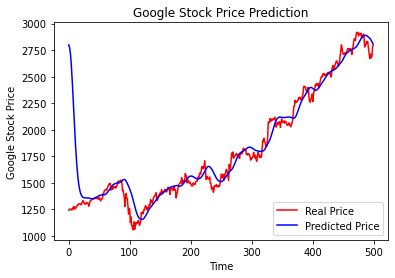

In [14]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()